In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


In [2]:
lc2022 = pd.read_csv('LC_2022Q4.csv')
#print(lc2022.head())

his_hears_40 = pd.read_csv('export_40/csv_results_40_303910_mp-04-his-hears.csv', sep = ';')
#print(his_hears_40.head())

# Naamsestraat 35 is outside of a club
oct_35 = pd.read_csv("OCT/csv_results_51_255439_mp-01-naamsestraat-35-maxim.csv", sep = ';')
#print(oct_35.head())

# Naamsestraat 57
# oct_57 = pd.read_csv("OCT/csv_results_51_255440_mp-02-naamsestraat-57-xior.csv", sep = ';')
#print(oct_57.head())

# Join the two dataframes 
his_hears_40['result_timestamp'] = pd.to_datetime(his_hears_40['result_timestamp'], format='%d/%m/%Y %H:%M:%S.%f')
his_hears_40['result_timestamp'] = his_hears_40['result_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
lc2022_his_hears_40 = pd.merge(lc2022, his_hears_40, left_on='DATEUTC', right_on='result_timestamp')
#print(lc2022_his_hears_40.head())
lc2022_his_hears_40['DATEUTC'] = pd.to_datetime(lc2022_his_hears_40['DATEUTC'])
lc2022_his_hears_40['hour'] = lc2022_his_hears_40['DATEUTC'].dt.hour

# oct_57['result_timestamp'] = pd.to_datetime(oct_57['result_timestamp'], format='%d/%m/%Y %H:%M:%S.%f')
# oct_57['result_timestamp'] = oct_57['result_timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
# oct57_lc2022 = pd.merge(oct_57, lc2022, left_on='result_timestamp', right_on='DATEUTC')
# oct57_lc2022['DATEUTC'] = pd.to_datetime(oct57_lc2022['DATEUTC'])
# oct57_lc2022['hour'] = oct57_lc2022['DATEUTC'].dt.hour
# print(oct57_lc2022.head())

oct_35["result_timestamp"] = pd.to_datetime(oct_35["result_timestamp"], format='%d/%m/%Y %H:%M:%S.%f')
oct_35["result_timestamp"] = oct_35["result_timestamp"].dt.strftime('%Y-%m-%d %H:%M:%S')
oct35_lc2022 = pd.merge(oct_35, lc2022, left_on='result_timestamp', right_on='DATEUTC')
oct35_lc2022['DATEUTC'] = pd.to_datetime(oct35_lc2022['DATEUTC'])
oct35_lc2022['hour'] = oct35_lc2022['DATEUTC'].dt.hour
print(oct35_lc2022.head())





   #object_id                    description     result_timestamp  lamax  \
0      255439  MP 01: Naamsestraat 35  Maxim  2022-10-01 00:10:00   61.5   
1      255439  MP 01: Naamsestraat 35  Maxim  2022-10-01 00:10:00   61.5   
2      255439  MP 01: Naamsestraat 35  Maxim  2022-10-01 00:10:00   61.5   
3      255439  MP 01: Naamsestraat 35  Maxim  2022-10-01 00:10:00   61.5   
4      255439  MP 01: Naamsestraat 35  Maxim  2022-10-01 00:10:00   61.5   

  lamax_unit  laeq laeq_unit   lceq lceq_unit  lcpeak  ... Month Day Hour  \
0      dB(A)  58.4     dB(A)  66.51     dB(C)   77.79  ...    10   1    0   
1      dB(A)  58.4     dB(A)  66.51     dB(C)   77.79  ...    10   1    0   
2      dB(A)  58.4     dB(A)  66.51     dB(C)   77.79  ...    10   1    0   
3      dB(A)  58.4     dB(A)  66.51     dB(C)   77.79  ...    10   1    0   
4      dB(A)  58.4     dB(A)  66.51     dB(C)   77.79  ...    10   1    0   

   Minute  LC_RAD60  LC_TEMP_QCL0  LC_TEMP_QCL1  LC_TEMP_QCL2  LC_TEMP_QCL3  \
0

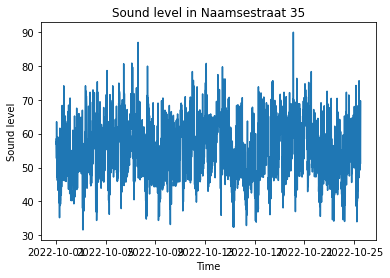

In [3]:
plt.plot(oct35_lc2022['DATEUTC'], oct35_lc2022['laeq'])
plt.xlabel('Time')
plt.ylabel('Sound level')
plt.title('Sound level in Naamsestraat 35')
plt.show()



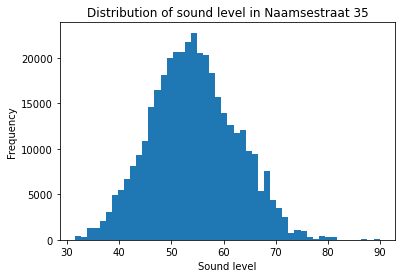

In [4]:
plt.hist(oct35_lc2022['laeq'], bins=50)
plt.xlabel('Sound level')
plt.ylabel('Frequency')
plt.title('Distribution of sound level in Naamsestraat 35')
plt.show()

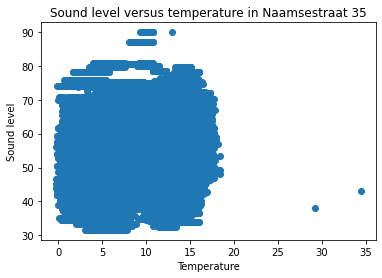

In [5]:
# Sound level vs Temperature 
plt.scatter(oct35_lc2022['LC_DWPTEMP'], oct35_lc2022['laeq'])
plt.xlabel('Temperature')
plt.ylabel('Sound level')
plt.title('Sound level versus temperature in Naamsestraat 35')
plt.show()


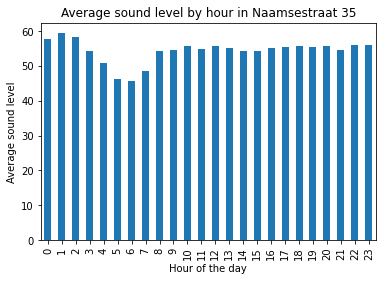

In [6]:
# add the values of the sound level for each hour to the vizualisation
hourly_avg = oct35_lc2022.groupby(oct35_lc2022['hour'])['laeq'].mean()
hourly_avg.plot(kind='bar')
plt.xlabel('Hour of the day')
plt.ylabel('Average sound level')
plt.title('Average sound level by hour in Naamsestraat 35')
plt.show()

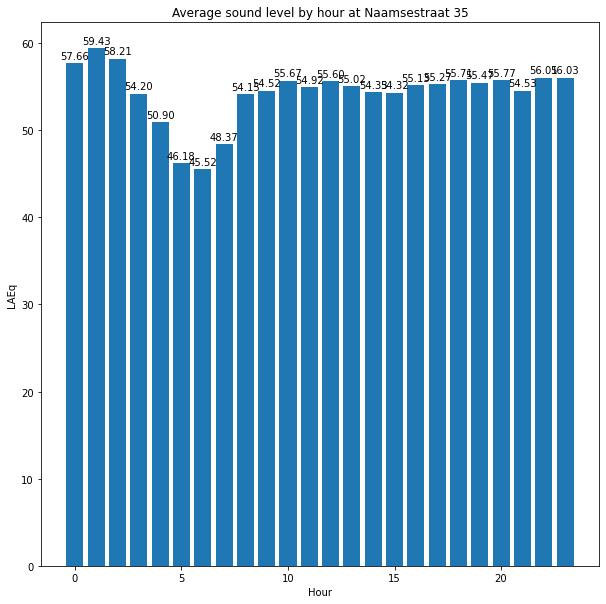

In [7]:

# group the data by hour and calculate the average laeq
hourly_data = oct35_lc2022.groupby(oct35_lc2022['hour'])['laeq'].agg('mean')

# create the bar chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(hourly_data.index, hourly_data.values)

# add the values as text over the bars
for i, val in enumerate(hourly_data.values):
    ax.text(i, val + 0.5, f"{val:.2f}", horizontalalignment='center')

# set the chart title and labels
ax.set_title('Average sound level by hour at Naamsestraat 35')
ax.set_xlabel('Hour')
ax.set_ylabel('LAEq')

# show the chart
plt.show()

<AxesSubplot:xlabel='hour', ylabel='laeq'>

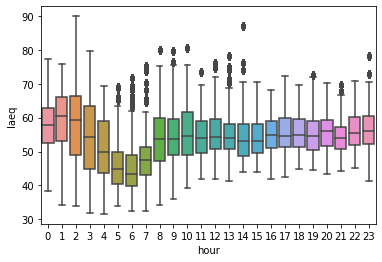

In [8]:
sns.boxplot(x='hour', y='laeq', data=oct35_lc2022)


<AxesSubplot:xlabel='day_of_week', ylabel='hour'>

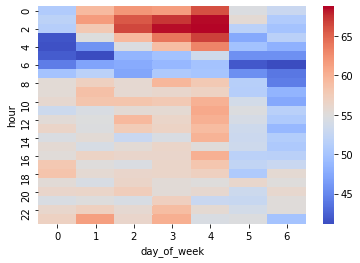

In [9]:
oct35_lc2022['day_of_week'] = oct35_lc2022['DATEUTC'].dt.dayofweek
heatmap_data = oct35_lc2022.pivot_table(index='hour', columns='day_of_week', values='laeq', aggfunc='mean')
sns.heatmap(data=heatmap_data, cmap='coolwarm')

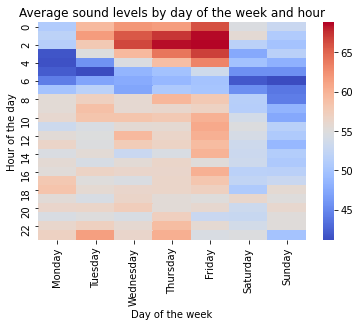

In [10]:
oct35_lc2022['day_of_week'] = oct35_lc2022['DATEUTC'].dt.day_name()
heatmap_data = oct35_lc2022.pivot_table(index='hour', columns='day_of_week', values='laeq', aggfunc='mean')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(columns=day_order)

sns.heatmap(data=heatmap_data, cmap='coolwarm')
plt.title('Average sound levels by day of the week and hour')
plt.xlabel('Day of the week')
plt.ylabel('Hour of the day')
plt.show()


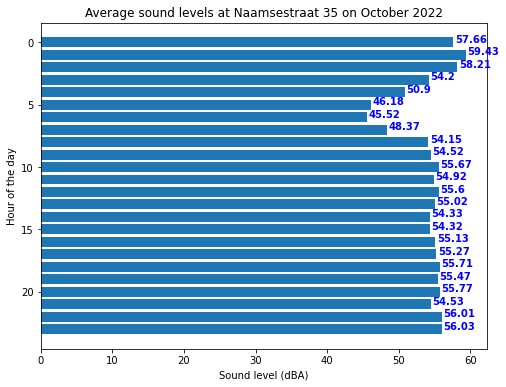

In [11]:
# Aggregate data by hour and take the mean value of the sound level
hourly_mean = oct35_lc2022.groupby('hour')['laeq'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.barh(hourly_mean['hour'], hourly_mean['laeq'])
plt.gca().invert_yaxis()
plt.xlabel('Sound level (dBA)')
plt.ylabel('Hour of the day')
plt.title('Average sound levels at Naamsestraat 35 on October 2022')
for i, v in enumerate(hourly_mean['laeq']):
    plt.text(v + 0.2, i, str(round(v, 2)), color='blue', fontweight='bold')
plt.show()


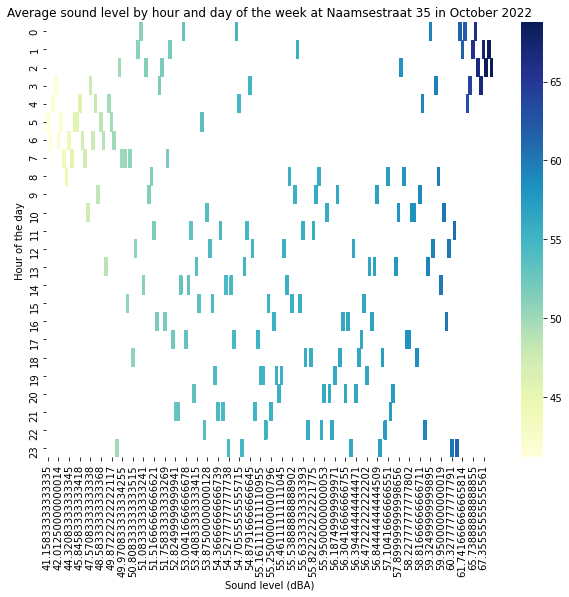

In [21]:
# Calculate average sound level by hour and day of the week
oct35_lc2022['weekday_name'] = oct35_lc2022['DATEUTC'].dt.day_name()
hourly_weekday_avg = oct35_lc2022.groupby([oct35_lc2022['DATEUTC'].dt.hour, oct35_lc2022['weekday_name']])['laeq'].mean().reset_index()
hourly_weekday_avg_pivot = hourly_weekday_avg.pivot(index='DATEUTC', columns='laeq', values='laeq')
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(hourly_weekday_avg_pivot, cmap='YlGnBu')
plt.xlabel('Sound level (dBA)')
plt.ylabel('Hour of the day')
plt.title('Average sound level by hour and day of the week at Naamsestraat 35 in October 2022')
plt.show()